# 1.

In [1]:
import datetime
import time

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from IOHandler import *

%matplotlib widget

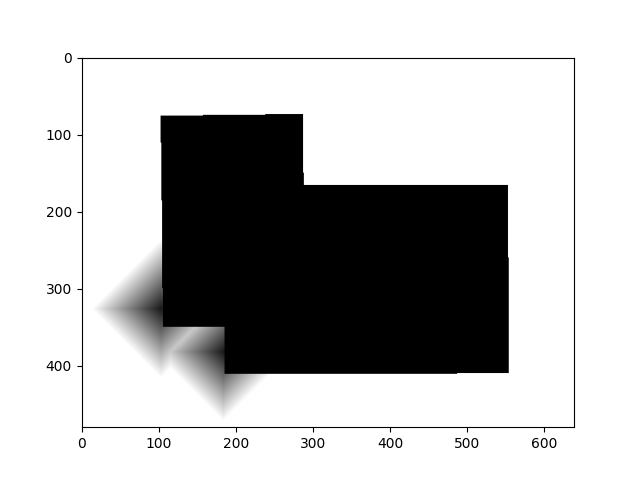

In [2]:
numpy_array = image2numpy(
    'polygon.png', 
    entrance=[(382, 183), (326, 102)]
    )
plt.imshow(numpy_array, cmap='gray_r')


In [3]:
numpy_array.shape

(480, 640)

In [4]:

handler = IOHandler(
    numpy_array, 
    36.3740132, 
    127.3651689,
    36.374502, 
    127.3662224
)


In [5]:
N = 1000000
shift = 50
xq = handler.longitudes[np.random.randint(shift, 480-shift, N)] + np.random.rand(N) * 0.00000001
yq = handler.latitudes[np.random.randint(shift, 640-shift, N)]  + np.random.rand(N) * 0.00000001

startTime = time.time()
for x,y in zip(xq, yq):
    handler.searchValid(y, x)
endTime = time.time()

print(f'per sampling costs {(endTime-startTime)/N*1000:.5f} ms')


per sampling costs 0.00381 ms
